In [313]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [314]:
data = pd.read_csv("https://gist.github.com/BirajCoder/5f068dfe759c1ea6bdfce9535acdb72d/raw/c84d84e3c80f93be67f6c069cbdc0195ec36acbd/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [315]:
your_name = "Victor" # at least 5 characters

In [316]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi * ord(rand_str[1])/100.
    # scale target
    dataframe.charges = dataframe.charges * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe

In [317]:
dataframe = customize_dataset(data, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
805,45,female,37.60575,0,no,northwest,7654.539271
1173,38,male,30.72300,2,no,northwest,6393.264966
0,19,female,29.29500,0,yes,southwest,16716.074760
681,19,male,21.31500,0,no,southwest,1229.837400
215,41,female,38.95500,2,no,southwest,7298.054280


Let us answer some basic questions about the dataset. 


**Q1: How many rows does the dataset have?**

In [318]:
num_rows = len(dataframe)
print(num_rows)

1271


**Q2: How many columns doe the dataset have**

In [319]:
num_cols = len(dataframe.columns)
print(num_cols)

7


**Q3: What are the column titles of the input variables?**

In [320]:
input_cols = ["age","sex","bmi","children","smoker","region"]
input_cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [321]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Q4: Which of the input columns are non-numeric or categorial variables ?**

Hint: `sex` is one of them. List the columns that are not numbers.

In [322]:
categorical_cols = data.select_dtypes(include="object")
categorical_cols = categorical_cols.columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

**Q5: What are the column titles of output/target variable(s)?**

In [323]:
output_cols = ["charges"]
output_cols

['charges']

/home/meghal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Charges'}, xlabel='charges', ylabel='Density'>

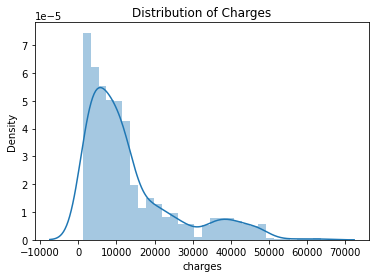

In [324]:
plt.title("Distribution of Charges")
sns.distplot(data.charges, kde=True)

In [325]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [326]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[45.     ,  0.     , 37.60575,  0.     ,  0.     ,  1.     ],
        [38.     ,  1.     , 30.723  ,  2.     ,  0.     ,  1.     ],
        [19.     ,  0.     , 29.295  ,  0.     ,  1.     ,  3.     ],
        ...,
        [33.     ,  0.     , 35.175  ,  0.     ,  1.     ,  3.     ],
        [53.     ,  1.     , 30.324  ,  0.     ,  0.     ,  1.     ],
        [50.     ,  0.     , 48.3945 ,  1.     ,  0.     ,  2.     ]]),
 array([[ 7654.5392715],
        [ 6393.264966 ],
        [16716.07476  ],
        ...,
        [36708.57828  ],
        [ 9771.112098 ],
        [ 9454.069449 ]]))

**Q6: Convert the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.**

In [327]:
inputs = torch.tensor(inputs_array,dtype=torch.float32)
targets = torch.tensor(targets_array,dtype=torch.float32)
print(inputs)
print(targets)

tensor([[45.0000,  0.0000, 37.6058,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000, 30.7230,  2.0000,  0.0000,  1.0000],
        [19.0000,  0.0000, 29.2950,  0.0000,  1.0000,  3.0000],
        ...,
        [33.0000,  0.0000, 35.1750,  0.0000,  1.0000,  3.0000],
        [53.0000,  1.0000, 30.3240,  0.0000,  0.0000,  1.0000],
        [50.0000,  0.0000, 48.3945,  1.0000,  0.0000,  2.0000]])
tensor([[ 7654.5391],
        [ 6393.2651],
        [16716.0742],
        ...,
        [36708.5781],
        [ 9771.1123],
        [ 9454.0693]])


In [328]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [329]:
dataset = TensorDataset(inputs, targets)
len(dataset)

1271

**Q7: Pick a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then use `random_split` to create training & validation datasets.**

In [330]:
val_percent = 0.75 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = random_split(dataset, lengths=[train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

Finally, we can create data loaders for training & validation.

**Q8: Pick a batch size for the data loader.**

In [331]:
batch_size = 32

In [332]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [333]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[55.0000,  0.0000, 31.3215,  0.0000,  0.0000,  0.0000],
        [22.0000,  0.0000, 30.2610,  0.0000,  0.0000,  2.0000],
        [55.0000,  1.0000, 34.6500,  0.0000,  0.0000,  2.0000],
        [46.0000,  0.0000, 50.4735,  2.0000,  0.0000,  0.0000],
        [36.0000,  0.0000, 20.8477,  0.0000,  0.0000,  0.0000],
        [41.0000,  0.0000, 34.6133,  0.0000,  0.0000,  1.0000],
        [44.0000,  0.0000, 31.3005,  2.0000,  0.0000,  2.0000],
        [39.0000,  0.0000, 24.4387,  3.0000,  0.0000,  0.0000],
        [18.0000,  1.0000, 29.7255,  1.0000,  0.0000,  0.0000],
        [63.0000,  1.0000, 22.7430,  1.0000,  0.0000,  1.0000],
        [46.0000,  0.0000, 29.1270,  0.0000,  0.0000,  1.0000],
        [61.0000,  0.0000, 37.7055,  0.0000,  0.0000,  0.0000],
        [30.0000,  1.0000, 30.1245,  3.0000,  1.0000,  1.0000],
        [54.0000,  1.0000, 42.5933,  3.0000,  1.0000,  0.0000],
        [49.0000,  1.0000, 30.1350,  1.0000,  0.0000,  3.0000],
        [24.0000,  0.0000, 23.73

In [334]:
input_size = len(input_cols)
output_size = len(output_cols)
print(input_size, output_size)

6 1


**Q9: Complete the class definition below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.**

Hint: Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions

In [335]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.mse_loss(out, targets)                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.mse_loss(out, targets)                           # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [336]:
model = InsuranceModel()

In [337]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2662,  0.0134, -0.1888,  0.0533,  0.3610,  0.1282]],
        requires_grad=True), Parameter containing:
 tensor([-0.2077], requires_grad=True)]

In [338]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Q10: Use the `evaluate` function to calculate the loss on the validation set before training.**

In [339]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 315885632.0}


**Q11: Train the model 4-5 times with different learning rates & for different number of epochs.**

Hint: Vary learning rates by orders of 10 (e.g. `1e-2`, `1e-3`, `1e-4`, `1e-5`, `1e-6`) to figure out what works.

In [340]:
epochs = 5
lr = 0.01
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [5], val_loss: nan


In [341]:
epochs = 4
lr = 0.001
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [4], val_loss: nan


In [342]:
epochs = 3
lr = 0.0001
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [3], val_loss: nan


In [343]:
epochs = 2
lr = 0.00001
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [2], val_loss: nan


In [344]:
epochs = 1
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [1], val_loss: nan


**Q12: What is the final validation loss of your model?**

In [348]:
val_loss = [r['val_loss'] for r in [result] + history5]
print("final validation loss is",val_loss[1])

final validation loss is nan


## Step 5: Make predictions using the trained model

**Q13: Complete the following function definition to make predictions on a single input**

In [346]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [347]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([58.0000,  1.0000, 24.4650,  0.0000,  0.0000,  3.0000])
Target: tensor([11232.0635])
Prediction: tensor([nan])
